In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [6]:
X = iris["data"][:, (2,3)] #Petal length and petal width
y = (iris["target"] == 2).astype(np.float64) #Iris Virginica

In [9]:
svm_clf = Pipeline((
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
))

In [10]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nonlinear SVM Classification

In [17]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

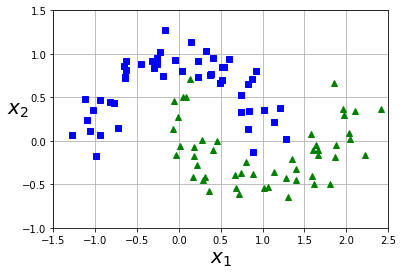

In [18]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
polynomial_svm_clf = Pipeline((
                            ("poly_features", PolynomialFeatures(degree = 3)),
                            ("scaler", StandardScaler()),
                            ("svm_clf", LinearSVC(C = 10, loss = "hinge"))))

In [15]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## Important

With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(kernel="linear")), especially if the training set is very large or
if it has plenty of features. If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in
most cases. Then if you have spare time and computing power, you can also experiment with a few other kernels using crossvalidation and grid search, especially if there are kernels specialized for your training set’s data structure.